# M8HW Assignment: P Burke
### Module 8: Student choice module

Submit this code as a pull request back to GitHub Classroom by the date and time listed in Canvas.

For this assignment, I have selected to look for relationships between rain-triggered landslides and daily precipitation rates to support an assessment of risk associated with future rain events.

### Dataset Description  
I am using the following datasets:  
 * Atlantic HURDAT 2: [OASIS HUB HURDAT 2](https://oasishub.co/dataset/hurdat-2-atlantic-hurricane-database): hurricane track and wind speed at 6-hr intervals (4 locations daily)  
 * GPM IMERGE doi:[10.5067/GPM/IMERGDF/DAY/06](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGDF_06/summary): daily (and sub-daily) precipitation records from satellites     
 * NASA GLC doi:[1007/s11069-009-9401-4](https://link.springer.com/article/10.1007/s11069-009-9401-4): location of reported landslides, fatalities, and risk maps    


### Step 1: Access and prepare hurricane data

Hurricane data come from NOAA's National Hurricane Center's reanalysis project [North Atlantic hurricane database (NHC HURDAT)](https://www.nhc.noaa.gov/data/). The dataset includes hurricane track and wind speed at 6 hour intervals from 1851 to 2021. Although I couldn't find a DOI for this dataset, the data can be publically accessed with a user account here: [OASIS HUB HURDAT 2](https://oasishub.co/dataset/hurdat-2-atlantic-hurricane-database).  

I used a preprocessed dataset that needed less wrangling available on [Kaggle](https://www.kaggle.com/datasets/noaa/hurricane-database). I also used the R script `01_HURDAT2-date-prep.R`.   

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from datetime import datetime
#from sklearn.model_selection import train_test_split, RandomizedSearchCV
#from sklearn.linear_model import LinearRegression

In [4]:
ATh_track = pd.read_csv('./data/NOAA_HURDAT/atlantic.csv')

In [5]:
ATh_track.tail(25)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
49080,AL112015,JOAQUIN,20151014,0,,EX,36.0N,9.0W,20,1011,...,0,0,0,0,0,0,0,0,0,0
49081,AL112015,JOAQUIN,20151014,600,,EX,35.5N,8.7W,20,1011,...,0,0,0,0,0,0,0,0,0,0
49082,AL112015,JOAQUIN,20151014,1200,,EX,35.1N,8.4W,20,1011,...,0,0,0,0,0,0,0,0,0,0
49083,AL112015,JOAQUIN,20151014,1800,,EX,35.0N,8.0W,15,1012,...,0,0,0,0,0,0,0,0,0,0
49084,AL112015,JOAQUIN,20151015,0,,EX,35.2N,7.7W,15,1012,...,0,0,0,0,0,0,0,0,0,0
49085,AL122015,KATE,20151108,1800,,TD,22.2N,71.5W,30,1010,...,0,0,0,0,0,0,0,0,0,0
49086,AL122015,KATE,20151109,0,,TD,22.8N,72.6W,30,1010,...,0,0,0,0,0,0,0,0,0,0
49087,AL122015,KATE,20151109,600,,TS,23.4N,73.7W,35,1010,...,0,30,0,0,0,0,0,0,0,0
49088,AL122015,KATE,20151109,1200,,TS,24.1N,74.8W,40,1008,...,0,30,0,0,0,0,0,0,0,0
49089,AL122015,KATE,20151109,1800,,TS,25.0N,75.7W,45,1008,...,0,30,0,0,0,0,0,0,0,0


In [4]:
ATh_track.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,4.910500e+04,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000
mean,1.949802e+07,910.125975,52.005091,-251.406496,-868.671031,-869.315772,-872.676428,-871.409245,-875.570940,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295
std,4.461850e+05,671.043363,27.681902,964.313907,353.299666,351.548910,342.153768,345.628984,333.651396,333.133376,330.526085,331.535176,328.027275,327.774794,327.021430,327.408253
min,1.851062e+07,0.000000,-99.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.911110e+07,600.000000,35.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.956093e+07,1200.000000,45.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,1.989081e+07,1800.000000,70.000000,990.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,2.015111e+07,2330.000000,165.000000,1024.000000,710.000000,600.000000,640.000000,530.000000,360.000000,300.000000,330.000000,360.000000,180.000000,250.000000,150.000000,180.000000


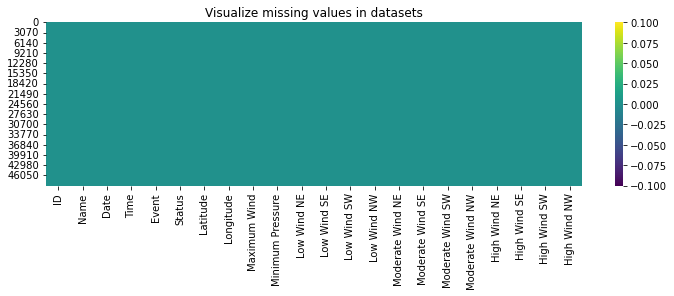

In [5]:
# Check for missing values

plt.figure(figsize=(12, 3))
sns.heatmap(ATh_track.isnull(), cmap='viridis');
plt.title('Visualize missing values in datasets');

### Step 2: Landslide data

Data were accesed from the [NASA Cooperative Open Online Landslide Repository (COOLR)](https://maps.nccs.nasa.gov/arcgis/apps/MapAndAppGallery/index.html?appid=574f26408683485799d02e857e5d9521). I used the NASA Global Landslide Catalog (GLC) Points, which catalogs **rainfall-triggered landslides**.

Current maps of landslide risk are available through NOAA's Landslide Hazard Assessment for Situational Awareness (LHASA) Model.

**Data Citation:**  
* Kirschbaum, D.B., Stanley, T., & Zhou, Y. (2015). Spatial and temporal analysis of a global landslide catalog. Geomorphology, 249, 4-15. doi:[1016/j.geomorph.2015.03.016](https://www.sciencedirect.com/science/article/abs/pii/S0169555X15001579) and  
* Kirschbaum, D.B., Adler, R., Hong, Y., Hill, S., & Lerner-Lam, A. (2010). A global landslide catalog for hazard applications: method, results, and limitations. Natural Hazards, 52, 561-575. doi:[1007/s11069-009-9401-4](https://link.springer.com/article/10.1007/s11069-009-9401-4)  


An important follow up paper for my research is: https://www.sciencedirect.com/science/article/abs/pii/S1364815222001608

In [10]:
ls_df = pd.read_csv('./data/NASA_GLC/nasa_global_landslide_catalog_point.csv', header = 0)
ls_df['event_date'] = pd.to_datetime(ls_df['event_date'], format='%Y/%m/%d') 
ls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39613 entries, 0 to 39612
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   OBJECTID                 39613 non-null  int64         
 1   Shape                    39613 non-null  object        
 2   source_name              39613 non-null  object        
 3   source_link              38778 non-null  object        
 4   event_id                 39613 non-null  int64         
 5   event_date               17565 non-null  datetime64[ns]
 6   event_time               27507 non-null  object        
 7   event_title              38923 non-null  object        
 8   event_description        36600 non-null  object        
 9   location_description     17175 non-null  object        
 10  location_accuracy        39585 non-null  object        
 11  landslide_category       39191 non-null  object        
 12  landslide_trigger        39611 n

In [11]:
# exclude lahar, earthquake, and other non-rain triggers
list = ['downpour','tropical_cyclone','continuous_rain','flooding','monsoon','rain','snowfall_snowmelt']

lspr_df = (ls_df.query('landslide_trigger in @list')
    .sort_values(['event_date'])
    )

In [12]:
fatality_df = (lspr_df.filter(['country_name', 'event_date', 'landslide_size','landslide_trigger','fatality_count','injury_count'])
    .groupby(['country_name']).sum().sort_values(['fatality_count'])
)
fatality_df.tail(35)

,fatality_count,injury_count
country_name,,
Honduras,86.0,3.0
Tajikistan,96.0,1.0
South Korea,98.0,16.0
Burundi,102.0,109.0
Dominican Republic,103.0,0.0
United States,108.0,108.0
Madagascar,113.0,4.0
Ethiopia,116.0,27.0
Malaysia,116.0,18.0


In [13]:
ls_SLV = lspr_df[ls_df.country_code=='SV']
ls_GTM = lspr_df[ls_df.country_code=='GT']
ls_GTM.describe()

C:\Users\pburke\AppData\Local\Temp\ipykernel_17964\2922668764.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ls_SLV = lspr_df[ls_df.country_code=='SV']
C:\Users\pburke\AppData\Local\Temp\ipykernel_17964\2922668764.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ls_GTM = lspr_df[ls_df.country_code=='GT']


,OBJECTID,event_id,fatality_count,injury_count,latitude,longitude,gazetteer_distance
count,8.400000e+01,84.000000,79.000000,43.000000,84.000000,84.000000,84.000000
mean,9.587184e+06,5020.833333,9.658228,9.139535,14.823111,-90.757416,7.358690
std,1.100681e+04,3263.649579,42.027734,56.984368,0.379501,0.552240,4.161399
min,9.568616e+06,165.000000,0.000000,0.000000,14.197400,-92.073800,0.040000
25%,9.577937e+06,1924.750000,0.000000,0.000000,14.590700,-91.129975,4.707500
50%,9.587694e+06,6660.500000,0.000000,0.000000,14.671250,-90.612750,6.760000
75%,9.595134e+06,7420.250000,4.000000,0.000000,14.934975,-90.494250,9.270000
max,9.606843e+06,13217.000000,280.000000,374.000000,15.807600,-88.928600,19.060000


In [14]:
print(ls_GTM.event_date.min())
print(ls_GTM.event_date.max())

print('Fatality count is: ', ls_GTM.fatality_count.sum())
print('Injury count is: ', ls_GTM.injury_count.sum())
print('Total landslides : ', ls_GTM.OBJECTID.count())

2007-08-09 00:00:00
2018-07-30 00:00:00
Fatality count is:  763.0
Injury count is:  393.0
Total landslides :  84


In [15]:
lsfat_GTM = ls_GTM.query('fatality_count != 0 and injury_count != 0').sort_values(['event_date'])
lsfat_GTM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 6116 to 24946
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   OBJECTID                 37 non-null     int64         
 1   Shape                    37 non-null     object        
 2   source_name              37 non-null     object        
 3   source_link              37 non-null     object        
 4   event_id                 37 non-null     int64         
 5   event_date               37 non-null     datetime64[ns]
 6   event_time               7 non-null      object        
 7   event_title              37 non-null     object        
 8   event_description        37 non-null     object        
 9   location_description     37 non-null     object        
 10  location_accuracy        37 non-null     object        
 11  landslide_category       37 non-null     object        
 12  landslide_trigger        37 non-

There were only 11 landslides in El Salvador with rain-triggered and reported landslides with fatatlities or injuries in the database. In Guatemala there were 37 reports. Major fatality events were in 2015 (August adn October rains) and in 2010 (May: tropical cyclone Agatha and June: tropical storm Alex)

<AxesSubplot:xlabel='event_date'>

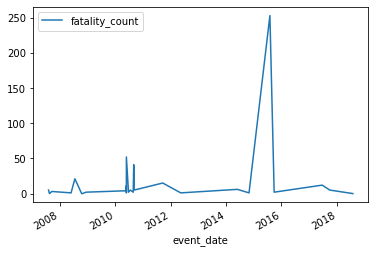

In [16]:
#ls_COL['event_year'] = pd.DatetimeIndex(ls_COL['event_date']).year
lsfat_GTM_plt = lsfat_GTM.filter(['event_date','fatality_count']).groupby(['event_date']).sum()
#lsfat_COL_plt['event_date'] = pd.to_datetime(lsfat_COL['event_date'], format='%Y/%m/%d') 
lsfat_GTM_plt.plot()

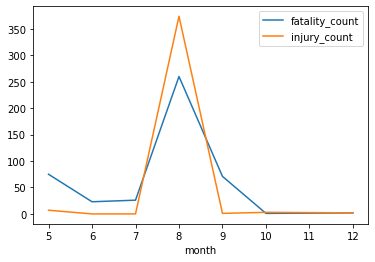

In [17]:
lsfat_GTM['month'] = pd.DatetimeIndex(lsfat_GTM['event_date']).month

lsmonthly_GTM = (lsfat_GTM.filter(['month','fatality_count','injury_count'])
    .groupby('month').sum()
    .plot()
    )

### Step 3: Access and Prepare Precipitation Data
Download Global Precipitation Measurement (GPM) Integrated Multi-SatellitE Retrievals for GPM (IMERG) daily data as netCDF file

**Data Set:**  
Final Precipitation L3 1 day 0.1 degree x 0.1 degree V06 (GPM_3IMERGDF): https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGDF_06/summary  
This dataset is ~11.1km grid and is available at 30min intervals, which would ultimately be preferred to match HURDAT2 data at 6-hr intervals. I am using daily interval to keep it simple.  

**Data Citation:**  
Huffman, G.J., E.F. Stocker, D.T. Bolvin, E.J. Nelkin, Jackson Tan (2019), GPM IMERG Final Precipitation L3 1 day 0.1 degree x 0.1 degree V06, Edited by Andrey Savtchenko, Greenbelt, MD, Goddard Earth Sciences Data and Information Services Center (GES DISC), Accessed: 2022-Dec-16, doi:[10.5067/GPM/IMERGDF/DAY/06](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGDF_06/summary)  

**Selected Parameters:**  
* Dataset: GPM IMERG Final Precipitation L3 1 day 0.1 degree x 0.1 degree V06  
* Download Method: Get File Subsets using OPeNDAP  
* Date Range: 2000-06-01 to 2021-09-30  
* Region: -94, 6, -76, 19 (Search and Crop)  
* Variables: precipitationCal  
* Format: netCDF  

Thanks to Youtube creator Aman Bagrecha for Google Colab script for accesing IMERG data: https://colab.research.google.com/drive/1VIKun8K3RT8VvcPJ7DE5uDDC10i10k1T?usp=sharing#scrollTo=F7WyMrxNzU86

I tried [Google Colab](https://colab.research.google.com/drive/16GgxJYj1t4JRIsCzpGHGvbAyauMM5XK5), Wget, and the python script `DISC-Requests-script.py` to access the data. I realize with wget I am unable to install cookies due to security software. 

Using python, the resulting NetCDF data appears corrupted, which may also be due to user persmissions on my machine. I did not have time to set up environment and try on a personal machine.

Based on the fatality data, I will subset the data to the rainy season of 2015.  

**Dataset parameters:**  
* Dataset: GPM IMERG Final Precipitation L3 1 day 0.1 degree x 0.1 degree V06  
* Download Method: Get File Subsets using OPeNDAP  
* Date Range: 2015-06-01 to 2015-12-31 
* Region: -96, 7, -76, 19 (Search and Crop) 
* Variables: precipitationCal  
* Format: netCDF  

The code below is from `DISC-Requests-script.py`:


In [18]:
import xarray as xr
import requests 

In [19]:
# Set the URL string to point to a specific data URL. Some generic examples are:
#   https://servername/data/path/file
#   https://servername/opendap/path/file[.format[?subset]]
#   https://servername/daac-bin/OTF/HTTP_services.cgi?KEYWORD=value[&KEYWORD=value]
URL = 'https://gpm1.gesdisc.eosdis.nasa.gov/opendap/GPM_L3/GPM_3IMERGDF.06/2015/06/'
   
# Set the FILENAME string to the data file name, the LABEL keyword value, or any customized name. 
FILENAME = '3B-DAY.MS.MRG.3IMERG.20150708-S000000-E235959.V06.nc4'
   
import requests
result = requests.get(URL)

try:
    result.raise_for_status()
    f = open(FILENAME,'wb')
    f.write(result.content)
    f.close()
    print('contents of URL written to '+FILENAME)
except:
    print('requests.get() returned an error code '+str(result.status_code))

contents of URL written to 3B-DAY.MS.MRG.3IMERG.20150708-S000000-E235959.V06.nc4


In [22]:
xr_df = xr.open_dataset('test2.nc4', engine ='netcdf4')
#xr_df = xr.open_dataset('3B-DAY.MS.MRG.3IMERG.20150623-S000000-E235959.V06.nc4', engine = 'netcdf4')
xr_df.info()

xarray.Dataset {
dimensions:
	time = 1 ;
	lon = 201 ;
	lat = 121 ;

variables:
	float32 precipitationCal(time, lon, lat) ;
		precipitationCal:units = mm ;
		precipitationCal:long_name = Daily accumulated precipitation (combined microwave-IR) estimate ;
		precipitationCal:coordinates = time lon lat ;
		precipitationCal:origname = precipitationCal ;
		precipitationCal:fullnamepath = /precipitationCal ;

// global attributes:
	:BeginDate = 2015-06-03 ;
	:BeginTime = 00:00:00.000Z ;
	:EndDate = 2015-06-03 ;
	:EndTime = 23:59:59.999Z ;
	:FileHeader = StartGranuleDateTime=2015-06-03T00:00:00.000Z;
StopGranuleDateTime=2015-06-03T23:59:59.999Z ;
	:InputPointer = 3B-HHR.MS.MRG.3IMERG.20150603-S000000-E002959.0000.V06B.HDF5;3B-HHR.MS.MRG.3IMERG.20150603-S003000-E005959.0030.V06B.HDF5;3B-HHR.MS.MRG.3IMERG.20150603-S010000-E012959.0060.V06B.HDF5;3B-HHR.MS.MRG.3IMERG.20150603-S013000-E015959.0090.V06B.HDF5;3B-HHR.MS.MRG.3IMERG.20150603-S020000-E022959.0120.V06B.HDF5;3B-HHR.MS.MRG.3IMERG.20150603-S0

In [28]:
%%time

xr_df = xr.open_mfdataset('test1/test*.nc4', parallel=True, engine='netcdf4')

ValueError: Could not find any dimension coordinates to use to order the datasets for concatenation

In [ ]:
%matplotlib inline
#import datetime
#import matplotlib.pyplot as plt
#import s3fs #v2021.10 
#import fsspec #v2021.10 
#import dask
#from dask.distributed import performance_report, Client, progress


from dask.distributed import performance_report, Client, progress
client = Client()
client

In [ ]:
%%time

ds = pd.read_csv('data/GPM_IMERG/subset_GPM_3IMERGDF_06_20221219_184515_.txt', skiprows=2, header = None)[0]

for file in range(2, len(ds)):
  URL = ds[file]
  result = requests.get(URL)
  filename = 'test' + str(file) + '.nc4'
  with open(filename, 'wb') as f:
    f.write(result.content)

In [26]:
#xr_df = xr.open_mfdataset('test*.nc4', engine='netcdf4')

In [99]:
print('s3fs version: ', s3fs.__version__)
print('dask version: ', dask.__version__)

s3fs version:  2021.10.1
dask version:  2022.02.1


Unsure why I can't open a dask client. I can initiate a client in other notebooks.

Process for precip data analysis once I can get GPM IMERG data into python:  
1. Get daily precip for 11km grid cell at 2 week interval at points before the location/events in `SLVevents`  
2. Consider buffering the grid cell with surrounding 8 or single closest grid cell in average  
3. Look at cumulative precip over that time and peaks to see if there are thresholds  
4. Review the dataset for other location/precip volumes that exceed threshold  
5. Future analysis: look at CMIP or downscaled climate data for threshold exceedences  

### Step 4: Future Data

Regionally downscaled datasets for Central America are available by the Coordinated Regional Downscaling Experiment (CORDEX) Regional Models for Central America (CAM-44). These models are based on AR% CMIP5 methods. Only thee GCMs are available for CAM-44 at RCP 4.5, but thirteen models are available for RCP8.5. A visualization tool for the downscaled data products is is available through [Centro Clima](https://centroclima.org/escenarios-cambio-climatico/). The webiste also provides a [Standardized Precipitation Index (SPI) tool](https://centroclima.org/spi-cvtas/) showing average excess and deficit of rain across the region at 30, 60, and 90 days.  

I assume the following:  
* most landslides occur June through November in Central America (and most fatalities occur in October and November)  
* 5 day running average of precipiation is a suitable period for assessing rain-triggered landslide risk  

I used the climate scenarios tool to visually inspect the spatial distribution of downscaled predictions across Central America for the variable "Maximum precipitation in 24h". I used the RCP 8.5 scenario since it had a full ensemble of 13 models (compared to RCP4.5 with only 2). 
downloaded 